NAME:  HOSLEY, BRANDON
====

OPER 785 Assignment 3
---

Starter Code

Simple perceptron learning for NOT, OR, and AND.  Additionally the perceptron is trained on XOR, which 
like the from-scratch example shown in class, shows how non-linearly separable points cannot be trained 
with one layer.

Student will need to **analyze results and discuss** NOT, OR, and AND performance

Student will need to analyze results and discuss performance of single layer perceptron XOR

Student will need to build new multi layer perceptron for XOR, train, evaluate, and discuss performance

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers
from keras import callbacks

import keras as keras

In [2]:
print("Tensor_Flow version:")
print(tf.__version__)

print("Keras version:")
print(keras.__version__)

Tensor_Flow version:
2.3.0
Keras version:
2.4.3


# Step 0: Tools & Helper Functions

In [3]:
def makeDecisionBoundaryBool2(model,featureData,labelData,title):
    '''Build decision boundary figrue for 2-input, 1-output boolean logic functions
    Note that this assumes a hard sigmoid was used and establishes a cutoff at 0.5
    for predicting 0 or 1'''  
    cutoff = 0.5   #0.5 for Sigmoid. 0.0 for TANH
    fig, ax = plt.subplots()

    xmin,xmax = np.min(featureData[:,0])-0.1, np.max(featureData[:,0])+0.1
    ymin,ymax = np.min(featureData[:,1])-0.1, np.max(featureData[:,1])+0.1
    
    #Create filled countour map to color both sides of the boundary
    x = np.linspace(xmin,xmax,200)
    y = np.linspace(ymin,ymax,200)
    X, Y = np.meshgrid(x, y)
    grid = np.c_[X.ravel(),Y.ravel()]
    preds = model.predict(grid)  #get predictions
    z = preds.reshape(X.shape)>cutoff   # cutoff on predictions to return boolean output
    plt.contourf(X,Y,z,cmap='YlOrBr')
    
    #add annotated points to show where the boolean inputs lie on the graph
    ax.scatter(featureData[:,0],featureData[:,1], color='b', alpha = 0.5)
    for i, txt in enumerate(labelData):
        #ax.annotate(np.asscalar(txt), (featureData[i,0],featureData[i,1])) 
        ax.annotate(txt.item(), (featureData[i,0],featureData[i,1])) 
        
    #adjust the axis & add labels for the graph
    plt.axis([xmin, xmax, ymin, ymax])
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.title(title)  

def graphHistory(history, title):
    '''Function for graphing the training and valiedation accuracy and loss'''
    # summarize history for accuracy
    fig = plt.figure()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy ' + title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Tr. Acc', 'Val. Acc'])
    plt.show()

    # summarize history for loss
    fig = plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss ' + title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Tr. Loss', 'Val. Loss'])
    plt.show()
    

# Step 1: Generic Keras model for perceptron (must be parameterized on call)

In [4]:
def perceptron(width, learningRate):
    '''Builds and returns a perceptron model of arbitrary input width & learning rate'''
    model = Sequential()  #define the building mode - sequential
    # declare the hidden layer with 1 node, hard sigmoid
    # set bias vector to all 1s
    model.add(Dense(units=1, activation='hard_sigmoid', 
                    use_bias=True, bias_initializer='ones', 
                    input_shape=(width,)))
    # declare the adam optimizer
    adam = optimizers.Adam(lr=learningRate)
    # complile the model with loss = binary_crossentropy
    model.compile(optimizer=adam,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Step 2:  Boolean Datasets

In [5]:
# Inputs to the perceptrons
xONE = np.array([[1],[0]])
xTWO = np.array([[0,0],[0,1],[1,0],[1,1]])
    
# y matrices for boolean output
yNOT = np.matrix('0;1')
yAND = np.matrix('0;0;0;1')
yOR = np.matrix('0;1;1;1')
yXOR = np.matrix('0;1;1;0')

# Step 3:  Modeling the Boolean NOT Dataset

## Step 3a:  Fit model on NOT dataset

In [6]:
# Learning 'NOT'

pmNOT = perceptron(width=1,learningRate=0.1)
training_verbosity = 0 #set to 1 or 2 for more detaied training output, 0 for none

history = pmNOT.fit(x=xONE, y=yNOT, batch_size=1, epochs=100, verbose=training_verbosity, callbacks=None, 
                      validation_split=0.1, 
                      validation_data=(xONE,yNOT), shuffle=True, class_weight=None,sample_weight=None, initial_epoch=0)




## Step 3b:  Report Training and Validation Performance Results

1/1 - 0s - loss: 0.9234 - accuracy: 0.5000
[0.9234141111373901, 0.5]
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


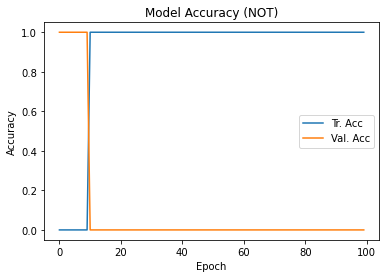

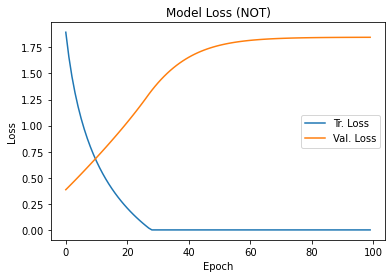

In [7]:
lossValMetrics = pmNOT.evaluate(xONE, yNOT, batch_size=2, verbose=2, sample_weight=None)
print(lossValMetrics)
#plot history
print(history.history.keys())    
graphHistory(history, '(NOT)')

{TODO:  instert model performance discussion here.  You should experiment with different learning rate, and max epochs}

# Step 4: Modeling the  OR Dataset

## Step 4a:  Fit Model on OR

In [8]:
# Learning OR
pmOR = perceptron(width=2,learningRate=0.1)
training_verbosity = 0 #set to 1 or 2 for more detaied training output, 0 for none
history = pmOR.fit(x=xTWO, y=yOR, batch_size=1, epochs=100, verbose=training_verbosity, callbacks=None, 
    validation_split=0.1, validation_data=(xTWO,yOR), shuffle=True, class_weight=None, 
    sample_weight=None, initial_epoch=0)

## Step 4b:  Evaluate training performance on OR

1/1 - 0s - loss: 0.0000e+00 - accuracy: 1.0000
[0.0, 1.0]
[array([[5.239253 ],
       [5.2276807]], dtype=float32), array([-2.721377], dtype=float32)]
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


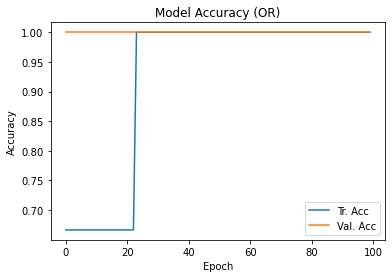

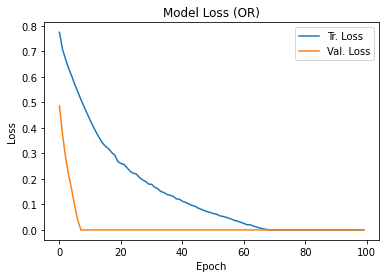

In [9]:
lossValMetrics = pmOR.evaluate(xTWO, yOR, batch_size=4, verbose=2, sample_weight=None)
print(lossValMetrics)
weights = pmOR.get_weights()
print(weights)
#plot history
print(history.history.keys())    
graphHistory(history, '(OR)')

{TODO:  insert model performance discussion here.  You should experiment with different learning rate, and max epochs}

## Step 4c:  Display the Decision Boundary on OR

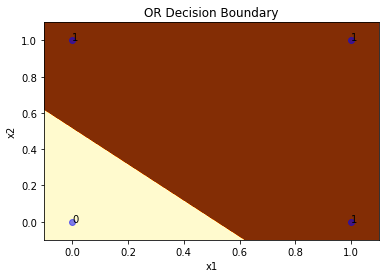

In [10]:
makeDecisionBoundaryBool2(pmOR,xTWO,yOR,'OR Decision Boundary')

{TODO:  insert discussion on the decision boundary and the relationship with the weights of the model.  }

# Step 5:  Modeling the AND Dataset

## Step 5a:  Fit model to AND Dataset

In [11]:
pmAND = perceptron(width=2,learningRate=0.01)
training_verbosity = 0 #set to 1 or 2 for more detaied training output, 0 for none
history = pmAND.fit(x=xTWO, y=yAND, batch_size=1, epochs=500, verbose=training_verbosity, callbacks=None, 
    validation_split=0.1, validation_data=(xTWO,yAND), shuffle=True, class_weight=None, 
    sample_weight=None, initial_epoch=0)

## Step 5b:  Evaluate Training Performance on AND Dataset

1/1 - 0s - loss: 3.8562 - accuracy: 0.7500
[3.8562371730804443, 0.75]
[array([[-1.7567817 ],
       [-0.68283373]], dtype=float32), array([-2.523577], dtype=float32)]


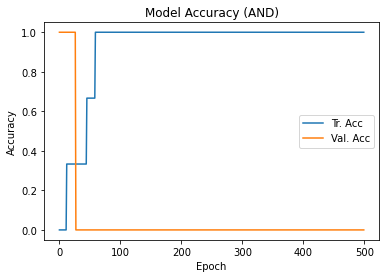

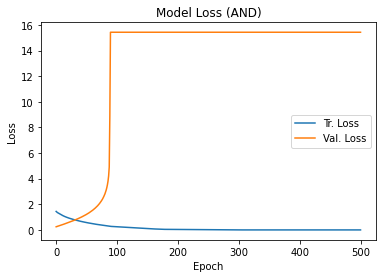

In [12]:
lossValMetrics = pmAND.evaluate(xTWO, yAND, batch_size=4, verbose=2, sample_weight=None)
print(lossValMetrics)
weights = pmAND.get_weights()
print(weights)
graphHistory(history, '(AND)')

## Step 5c:  Display Decision Boundary of AND Dataset

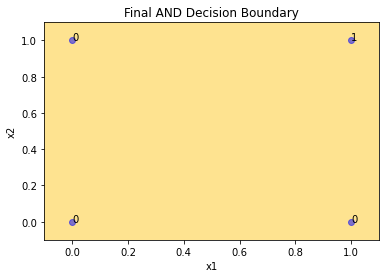

In [13]:
makeDecisionBoundaryBool2(pmAND,xTWO,yAND,'Final AND Decision Boundary')

{TODO - Describe Decision Boundary on AND Dataset}

# Step 6: Modeling XOR logic with a single perceptron

## Step 6a:  Fit a single perceptron to the XOR data

In [14]:
# This will not perform well due to the classes are not linearly seperable
print("Starting XOR training")
#batchSize, width, learningRate
pm_single_layerXOR = perceptron(width=2,learningRate=.1)
training_verbosity = 0 #set to 1 or 2 for more detaied training output, 0 for none
history = pm_single_layerXOR.fit(x=xTWO, y=yXOR, batch_size=1, epochs=200, verbose=training_verbosity, callbacks=None, 
    validation_split=0.1, validation_data=(xTWO,yXOR), shuffle=True, class_weight=None, 
    sample_weight=None, initial_epoch=0)
print("Completed XOR training")

Starting XOR training
Completed XOR training


## Step 6b:  Evaluate single perceptron model performance on the XOR data

1/1 - 0s - loss: 3.8123 - accuracy: 0.7500
[3.812309503555298, 0.75]
[array([[5.243814],
       [5.250912]], dtype=float32), array([-2.6576164], dtype=float32)]


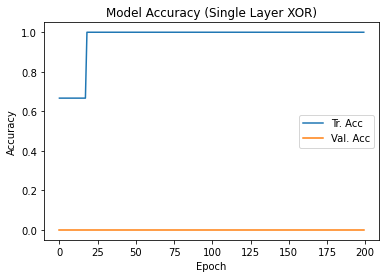

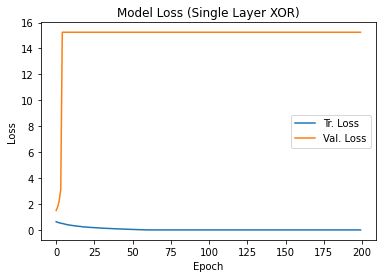

In [15]:
lossValMetrics = pm_single_layerXOR.evaluate(xTWO, yXOR, batch_size=4, verbose=2, sample_weight=None)
print(lossValMetrics)
print(pm_single_layerXOR.get_weights())
graphHistory(history, '(Single Layer XOR)')

## Step 6c:  Decision Boundary for XOR using single perceptron

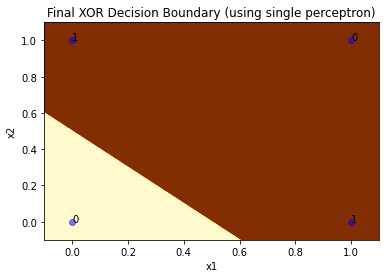

In [16]:
makeDecisionBoundaryBool2(pm_single_layerXOR,xTWO,yXOR,'Final XOR Decision Boundary (using single perceptron)')

# Step 7:  Modeling XOR with a Multilayer Perceptron

## Step 7a:  Define your multilayer models in Keras

{TODO: discussion of how you built the model & selected ranges of parameter choices}

In [17]:
#TODO - insert student code here
# your model should be called "pm_multi_layerXOR"

 

## Step 7b:  Fit the models on the XOR dataset

In [18]:
#TODO - insert student code here


## Step 7c:  Report the performances of the multilayer models on XOR

In [19]:
#TODO - insert Student code here


{TODO:  insert discussion here}

## Step 7d:  Plot the decision boundary for the best multilayer perceptron on XOR

In [20]:
#uncomment the following line after you build & train your model
#makeDecisionBoundaryBool2(pm_multi_layerXOR,xTWO,yXOR,'Final XOR Decision Boundary (using multilayer perceptron)')

{TODO:  insert discussion here}